# 최 하단부 plt에 한국어 표시하기 위한 부분

In [ ]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,413 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

# 마운트, 기본 피쳐 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mecab_noun의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 전처리 되어 있으므로 이미 되어 있는 파일 바로 부를 것

In [ ]:
# df_merge_2211292300.csv 파일을 읽어온다.

df_merge = pd.read_csv('/content/drive/MyDrive/Code/현국/df_merge_2212011311.csv', encoding='utf-8', index_col=0)
df_merge.tail()

,keyword,same,noun
318,영도커피페스티벌,싸다 무섭다 알차다 싫다 귀여우다 멋있다 추우다 놀랍다 슬프다 문제없다 급하다 인상...,입구 그림 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 쿠키 택시 한잔 ...
319,연제고분판타지축제,흐드러지다 싫다 걸맞다 멋있다 노랗다 가볍다 앙증맞다 엄청나다 휑하다 젊다 못지않다...,광장 하늘 사찰 강 입구 포즈 다양 운영 감성 박물관 색 산책로 추억 기념 화장실 ...
320,다대포어항문화축제,흔하다 싸다 기쁘다 무섭다 쩔다 알차다 싫다 귀여우다 오래다 멋있다 시끄럽다 급하다...,하늘 사찰 입구 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 택시 크림 ...
321,보수동책방골목문화축제,싸다 숱하다 무섭다 싫다 멋있다 무겁다 슬프다 급하다 즐겁다 가볍다 활기차다 젊다 ...,광장 작품 예매 하늘 전망대 바다 입구 그림 강 전시관 예약 다양 포즈 운영 영상 ...
322,카운트다운&해맞이축제,싸다 지겹다 알차다 생뚱맞다 싫다 추우다 멋있다 정답다 두렵다 놀랍다 급하다 가볍다...,하늘 사찰 입구 그림 강 운영 소주 추억 기념 구입 카드 볼거리 쿠키 택시 크림 동...


In [ ]:
# isinTrue 컬럼과 noun 컬럼 합침

df_merge['noun'] = df_merge['noun'].astype(str)
df_merge['same'] = df_merge['same'].astype(str)
df_merge['merge'] = df_merge['noun'] + df_merge['same']

df_merge.tail()

,keyword,same,noun,merge
318,영도커피페스티벌,싸다 무섭다 알차다 싫다 귀여우다 멋있다 추우다 놀랍다 슬프다 문제없다 급하다 인상...,입구 그림 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 쿠키 택시 한잔 ...,입구 그림 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 쿠키 택시 한잔 ...
319,연제고분판타지축제,흐드러지다 싫다 걸맞다 멋있다 노랗다 가볍다 앙증맞다 엄청나다 휑하다 젊다 못지않다...,광장 하늘 사찰 강 입구 포즈 다양 운영 감성 박물관 색 산책로 추억 기념 화장실 ...,광장 하늘 사찰 강 입구 포즈 다양 운영 감성 박물관 색 산책로 추억 기념 화장실 ...
320,다대포어항문화축제,흔하다 싸다 기쁘다 무섭다 쩔다 알차다 싫다 귀여우다 오래다 멋있다 시끄럽다 급하다...,하늘 사찰 입구 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 택시 크림 ...,하늘 사찰 입구 강 전시관 등대 운영 영상 소주 추억 기념 구입 볼거리 택시 크림 ...
321,보수동책방골목문화축제,싸다 숱하다 무섭다 싫다 멋있다 무겁다 슬프다 급하다 즐겁다 가볍다 활기차다 젊다 ...,광장 작품 예매 하늘 전망대 바다 입구 그림 강 전시관 예약 다양 포즈 운영 영상 ...,광장 작품 예매 하늘 전망대 바다 입구 그림 강 전시관 예약 다양 포즈 운영 영상 ...
322,카운트다운&해맞이축제,싸다 지겹다 알차다 생뚱맞다 싫다 추우다 멋있다 정답다 두렵다 놀랍다 급하다 가볍다...,하늘 사찰 입구 그림 강 운영 소주 추억 기념 구입 카드 볼거리 쿠키 택시 크림 동...,하늘 사찰 입구 그림 강 운영 소주 추억 기념 구입 카드 볼거리 쿠키 택시 크림 동...


# 전처리 시작

In [ ]:
# 데이터 불러오기

# mecab_noun = pd.read_csv('/content/drive/MyDrive/최종프로젝트/data/noun_intersection.csv', encoding='utf-8',index_col=0)
mecab_noun = pd.read_csv('/content/drive/MyDrive/Data/noun_NotFood_intersection.csv', encoding='utf-8',index_col=0)

mecab_noun.head()

,keyword,intersection
0,168계단,"['매장', '비', '기차', '날씨', '대표', '동생', '해상', '운영'..."
1,25의용단,"['매장', '날씨', '작품', '대표', '혼자', '햇빛', '운영', '관람..."
2,40계단 문화관,"['매장', '숲', '경치', '기차', '날씨', '혼자', '대표', '작품'..."
3,40계단 문화관광테마거리,"['매장', '빌딩', '숲', '경치', '기차', '날씨', '혼자', '대표'..."
4,60년전통 할매국밥,"['매장', '비', '기차', '날씨', '혼자', '대표', '환경', '작품'..."


In [ ]:
# intersection 컬럼을 noun로 변경하고 덮어쓰기

mecab_noun = mecab_noun.rename(columns={'intersection':'noun'})
mecab_noun.head()

,keyword,noun
0,168계단,"['매장', '비', '기차', '날씨', '대표', '동생', '해상', '운영'..."
1,25의용단,"['매장', '날씨', '작품', '대표', '혼자', '햇빛', '운영', '관람..."
2,40계단 문화관,"['매장', '숲', '경치', '기차', '날씨', '혼자', '대표', '작품'..."
3,40계단 문화관광테마거리,"['매장', '빌딩', '숲', '경치', '기차', '날씨', '혼자', '대표'..."
4,60년전통 할매국밥,"['매장', '비', '기차', '날씨', '혼자', '대표', '환경', '작품'..."


In [ ]:
mecab_noun['noun'] = mecab_noun['noun'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
mecab_noun.head()

<ipython-input-25-1e0029ae4b18>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mecab_noun['noun'] = mecab_noun['noun'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


,keyword,noun
0,168계단,매장 비 기차 날씨 대표 동생 해상 운영 친절 관람 딸 평일 해변 축제 이야기 핫 ...
1,25의용단,매장 날씨 작품 대표 혼자 햇빛 운영 관람 평일 아트 봄 벚꽃 연인 감상 동네 산책...
2,40계단 문화관,매장 숲 경치 기차 날씨 혼자 대표 작품 동생 오빠 수국 건강 햇빛 실내 향 해상 ...
3,40계단 문화관광테마거리,매장 빌딩 숲 경치 기차 날씨 혼자 대표 작품 동생 오빠 실내 향 해상 영화 피크닉...
4,60년전통 할매국밥,매장 비 기차 날씨 혼자 대표 환경 작품 오빠 동생 햇빛 실내 향 여름 고민 운영 ...


# 형용사 불러오기

In [ ]:
# 데이터 불러오기

df_mecab_adj = pd.read_csv('/content/drive/MyDrive/Code/소희/except_food_adj.csv', encoding='utf-8')

df_mecab_adj.head()


,keyword,same
0,서면1번가,"['흔하다', '수많다', '젊다', '싸다', '빨갛다', '눈부시다', '빠르다..."
1,광안리해수욕장,"['흔하다', '짠하다', '수많다', '드넓다', '젊다', '싸다', '빨갛다'..."
2,송정해수욕장,"['흔하다', '수많다', '드넓다', '젊다', '싸다', '휑하다', '빨갛다'..."
3,해운대해수욕장,"['흔하다', '수많다', '드넓다', '젊다', '싸다', '매섭다', '벅차다'..."
4,오륙도,"['수많다', '귀엽다', '드넓다', '싸다', '젊다', '알차다', '새롭다'..."


In [ ]:
df_mecab_adj['same'] = df_mecab_adj['same'].apply(lambda x: set(x.split())) # 행 중복 단어 제거

In [ ]:
df_mecab_adj['same']=df_mecab_adj['same'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))
df_mecab_adj['same'] = df_mecab_adj['same'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

<ipython-input-28-efa5c0861298>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mecab_adj['same'] = df_mecab_adj['same'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


In [ ]:
# df_mecab_adj와 mecab_noun을 merge

df_merge = pd.merge(df_mecab_adj, mecab_noun, on='keyword', how='left')

df_merge.head()

,keyword,same,noun
0,서면1번가,사납다 시끄럽다 놀랍다 좁다 낮다 가깝다 멀다 빠르다 찹다 야무지다 안타깝다 덥다 ...,매장 빌딩 숲 경치 기차 날씨 혼자 대표 환경 작품 오빠 동생 학교 수국 건강 햇빛...
1,광안리해수욕장,주옥같다 재미없다 아낌없다 슬푸다 두렵다 숨차다 따갑다 고되다 시끄럽다 놀랍다 좁다...,매장 비 빌딩 일출 날씨 혼자 대표 환경 오빠 학교 건강 햇빛 실내 영화 운영 케이...
2,송정해수욕장,주옥같다 새까맣다 드럽다 재미없다 따갑다 휑하다 문제없다 고되다 시끄럽다 놀랍다 좁...,매장 비 빌딩 일출 날씨 혼자 대표 환경 오빠 학교 건강 햇빛 실내 영화 운영 케이...
3,해운대해수욕장,주옥같다 새까맣다 드럽다 재미없다 슬푸다 매섭다 두렵다 따갑다 휑하다 시끄럽다 놀랍...,매장 비 빌딩 일출 날씨 혼자 대표 환경 오빠 학교 건강 햇빛 실내 영화 운영 케이...
4,오륙도,앙증맞다 정신없다 넓디넓다 환하다 힘드다 귀엽다 아깝다 낫다 맑다 귀여우다 노랗다 ...,비 빌딩 일출 숲 경치 날씨 혼자 대표 작품 동생 오빠 햇빛 해상 피크닉 여름 고민...


In [ ]:
# isinTrue가 NaN인 행 제거

df_merge = df_merge.dropna(subset=['same'])

df_merge.tail()

,keyword,same,noun
322,영도커피페스티벌,예뿌다 정신없다 반갑다 푸르다 아깝다 파랗다 맑다 재미없다 귀여우다 차갑다 문제없다...,매장 비 빌딩 일출 숲 경치 기차 날씨 혼자 대표 환경 동생 오빠 학교 수국 햇빛 ...
323,연제고분판타지축제,앙증맞다 서럽다 반갑다 환하다 아깝다 낫다 맑다 해맑다 휑하다 노랗다 안타깝다 이쁘...,날씨 혼자 오빠 운영 포즈 겨울 관람 평일 기록 축제 봄 내부 벚꽃 교육 연인 시대...
324,다대포어항문화축제,예뿌다 반갑다 색다르다 단촐하다 푸르다 귀엽다 아깝다 어려우다 맑다 느리다 해맑다 ...,매장 빌딩 일출 숲 경치 기차 날씨 혼자 대표 작품 동생 학교 수국 햇빛 실내 향 ...
325,보수동책방골목문화축제,더럽다 반갑다 색다르다 새까맣다 귀엽다 낫다 맑다 짙다 낡다 어지럽다 수많다 적다 ...,매장 숲 경치 기차 날씨 혼자 작품 동생 오빠 햇빛 향 고민 운영 개인 친절 포즈 ...
326,카운트다운&해맞이축제,앙증맞다 정신없다 반갑다 힘드다 귀엽다 낫다 부끄럽다 맑다 생뚱맞다 파랗다 재미없다...,매장 빌딩 일출 숲 경치 기차 날씨 혼자 대표 작품 오빠 수국 건강 햇빛 실내 향 ...


In [ ]:
# df_merge csv로 저장

df_merge.to_csv('/content/drive/MyDrive/Code/현국/df_merge_2212011848.csv', encoding='utf-8-sig')

# 벡터화 준비

In [ ]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 525 kB/s 
     |████████████████████████████████| 465 kB 52.0 MB/s 


In [ ]:
from konlpy.tag import Okt
okt = Okt()

# 벡터화 여러 방법 시도

# 그냥 실행하지 말 것. 무슨 조합인지 보고 실행 할 것

같이 돌리기, 따로 돌리기, 곱하기 등등...

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['same'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['same'])

tfidf_matrix.shape

(323, 372)

In [ ]:
# # 벡터화
# # tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['same'])

# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['same'], df_merge['noun'])

# tfidf_matrix.shape


(323, 333)

In [ ]:
# hierach

# 클러스터링

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=-1, random_state=42)
model.fit(tfidf_matrix)
labels = model.predict(tfidf_matrix)

labels

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,

# 기타

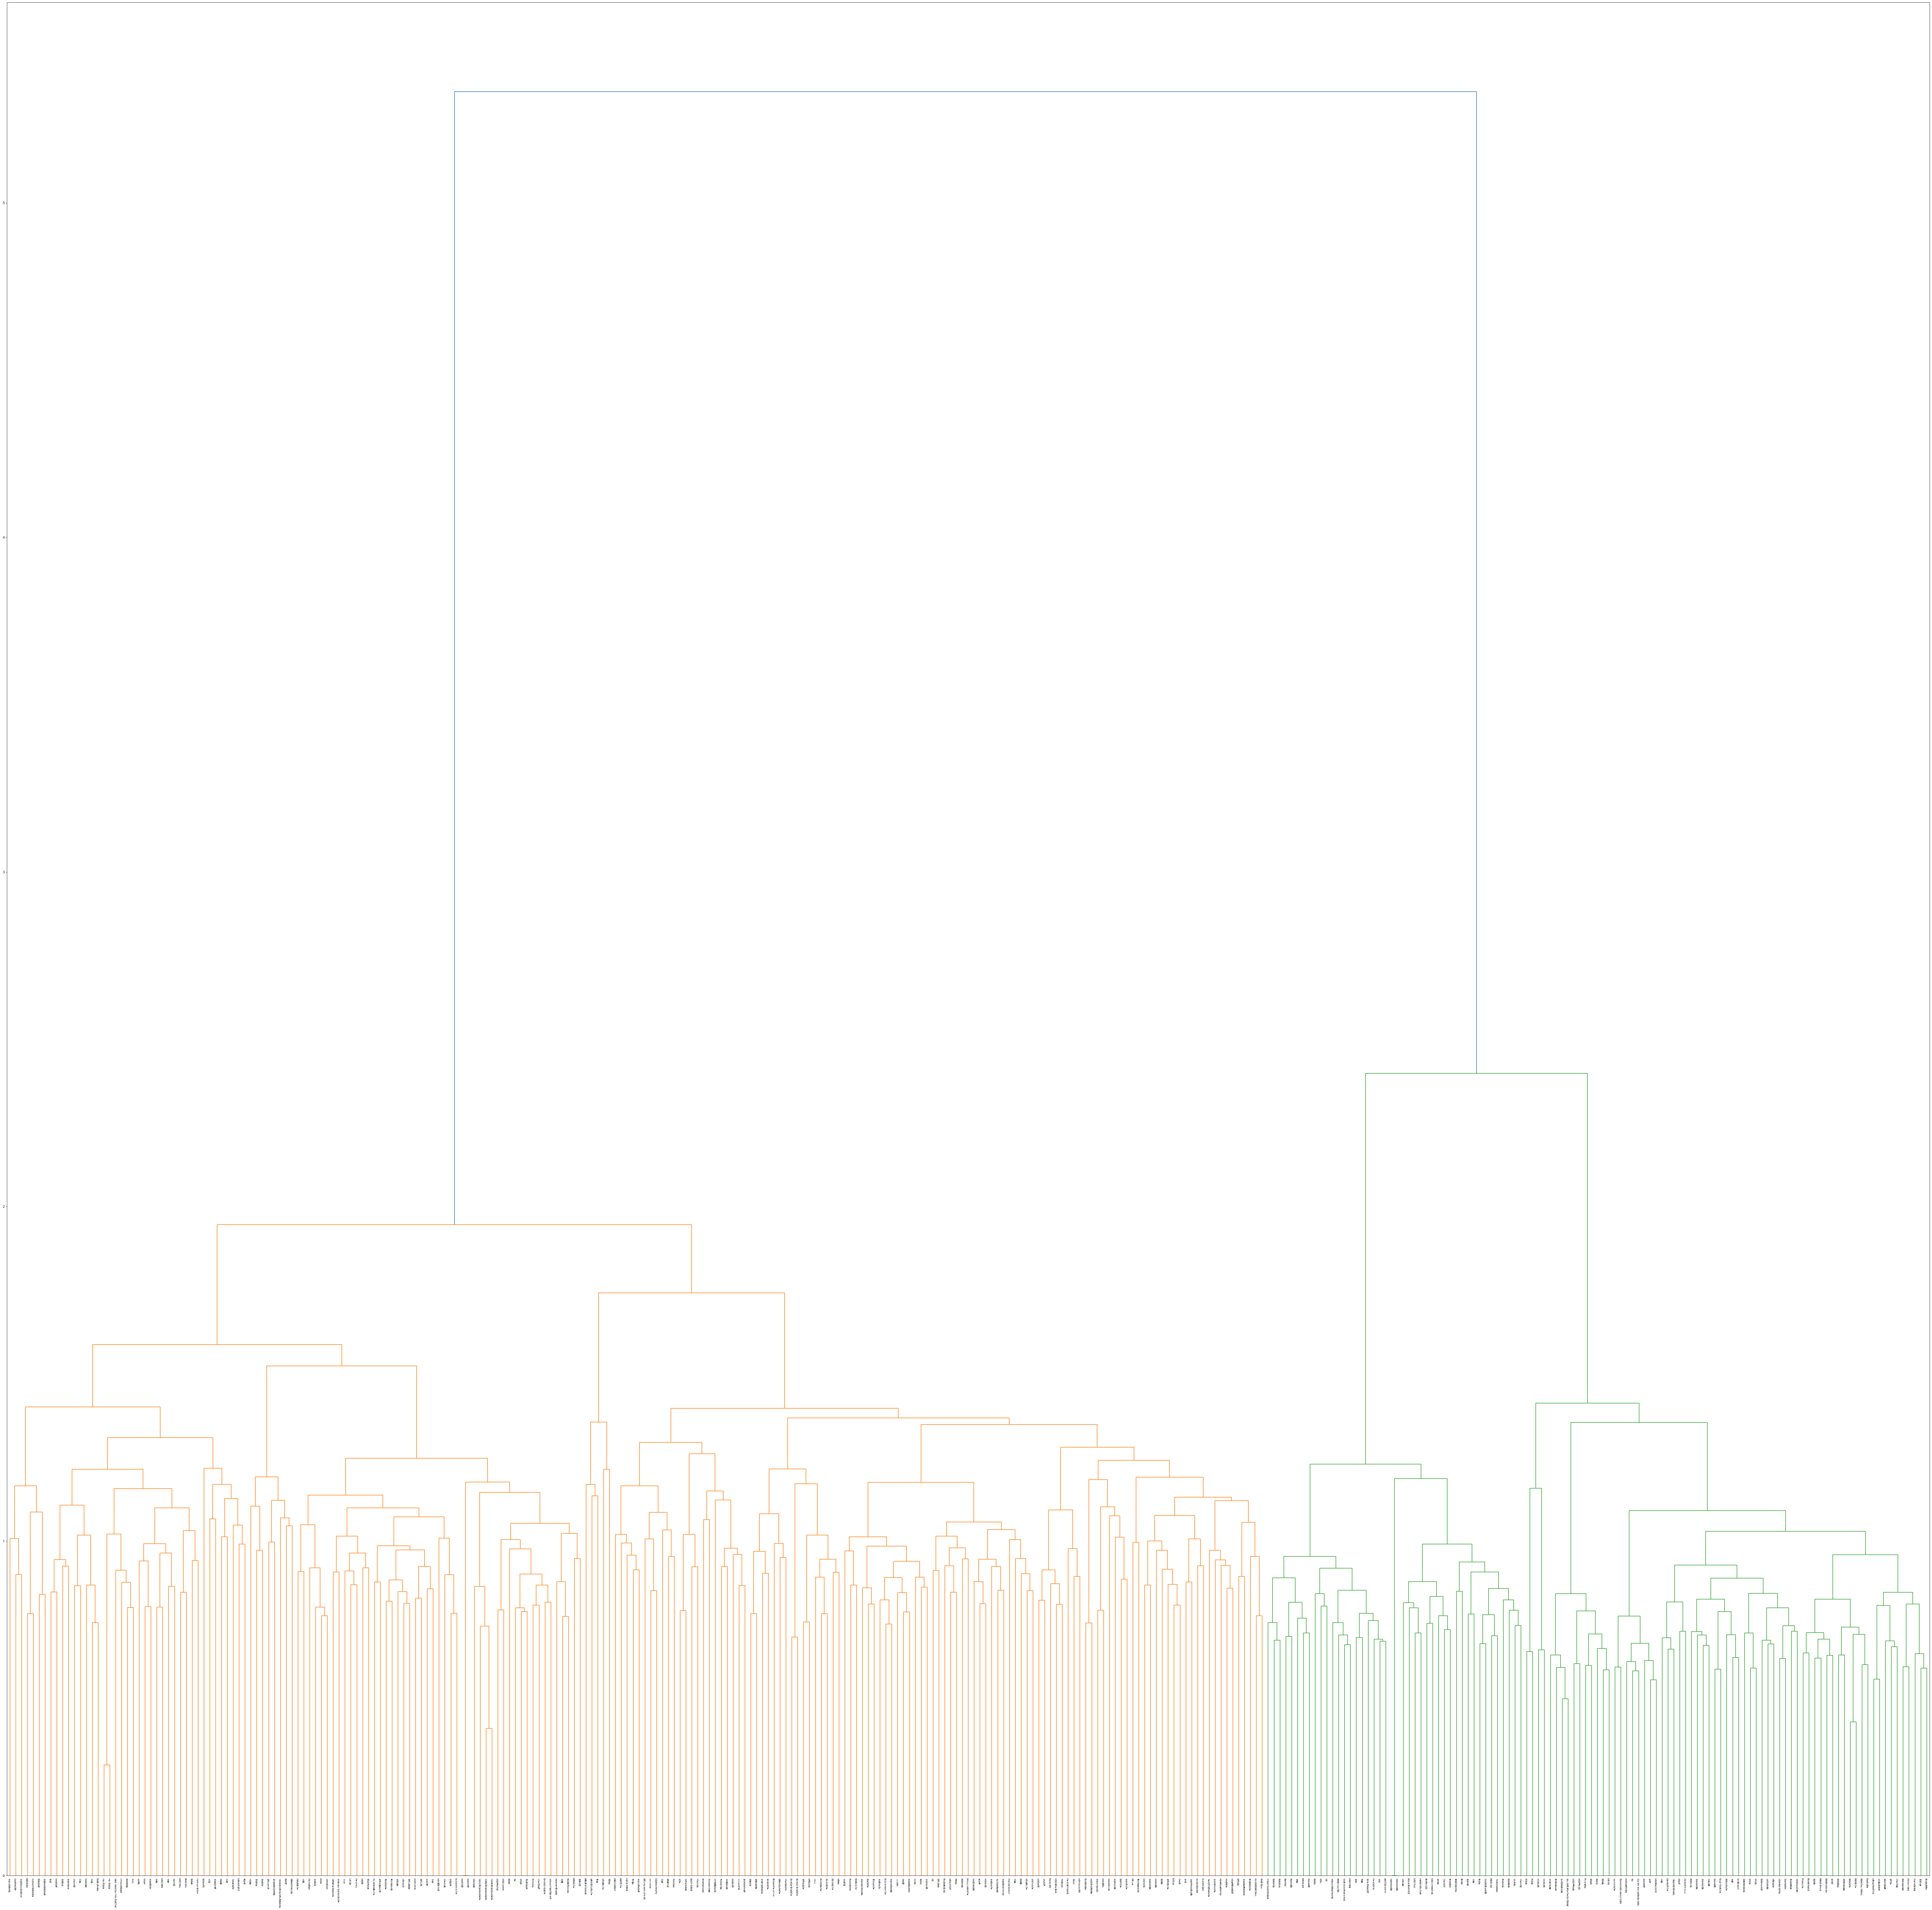

In [ ]:
# 덴드로그램 그리기

from scipy.cluster.hierarchy import linkage, dendrogram

# linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward', metric='euclidean')

plt.figure(figsize=(100, 100))

linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward', metric='euclidean')

dendrogram(linkage_matrix, labels=df_merge['keyword'].values)


plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


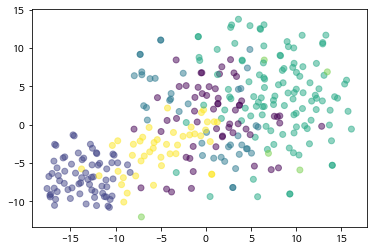

In [ ]:
# 병합 군집

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

cluster.fit_predict(tfidf_matrix.toarray())

# 군집 결과 확인

df_merge['cluster'] = cluster.labels_

df_merge.head()

# 시각화

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

model = TSNE(learning_rate=10)

transformed = model.fit_transform(tfidf_matrix.toarray())

xs = transformed[:,0]

ys = transformed[:,1]

plt.scatter(xs, ys, c=df_merge['cluster'], alpha=0.5)

plt.show()

////

In [ ]:
# bert 기반 클러스터링

!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 5.5 MB 38.9 MB/s 
     |████████████████████████████████| 1.3 MB 70.3 MB/s 
     |████████████████████████████████| 182 kB 27.5 MB/s 
     |████████████████████████████████| 7.6 MB 30.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=186361b4b8ef765f97d12873c49f65f3b5804bd3797ca21a5de096c76bd9af58
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')

sentence_embeddings = model.encode(df_merge['noun'] + df_merge['same'])

sentence_embeddings.shape

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

(327, 768)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


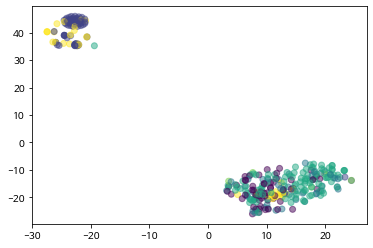

In [ ]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

model = TSNE(learning_rate=1000)

transformed = model.fit_transform(sentence_embeddings)

xs = transformed[:,0]

ys = transformed[:,1]

plt.scatter(xs, ys, c=df_merge['cluster'], alpha=0.5)

plt.show()

In [ ]:
# k-means 분석

from sklearn.cluster import KMeans

num_clusters = 4

clustering_model = KMeans(n_clusters=num_clusters)

clustering_model.fit(sentence_embeddings)

cluster_assignment = clustering_model.labels_

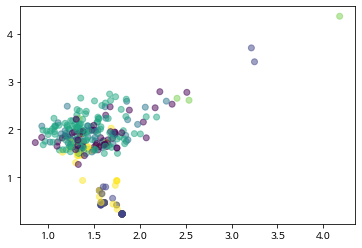

In [ ]:
import matplotlib.pyplot as plt

model = KMeans(n_clusters=3)

model.fit(sentence_embeddings)

transformed = model.fit_transform(sentence_embeddings)

xs = transformed[:,0]

ys = transformed[:,1]

plt.scatter(xs, ys, c=df_merge['cluster'], alpha=0.5)

plt.show()


In [ ]:
# cluster == 0 의 중심점을 표시

import numpy as np

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, edgecolor='k')
plt.show()

NameError: ignored

# 1

In [ ]:
# (0,1) 사이에 나오게 하기 위해 PCA 사용

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

plt.show()

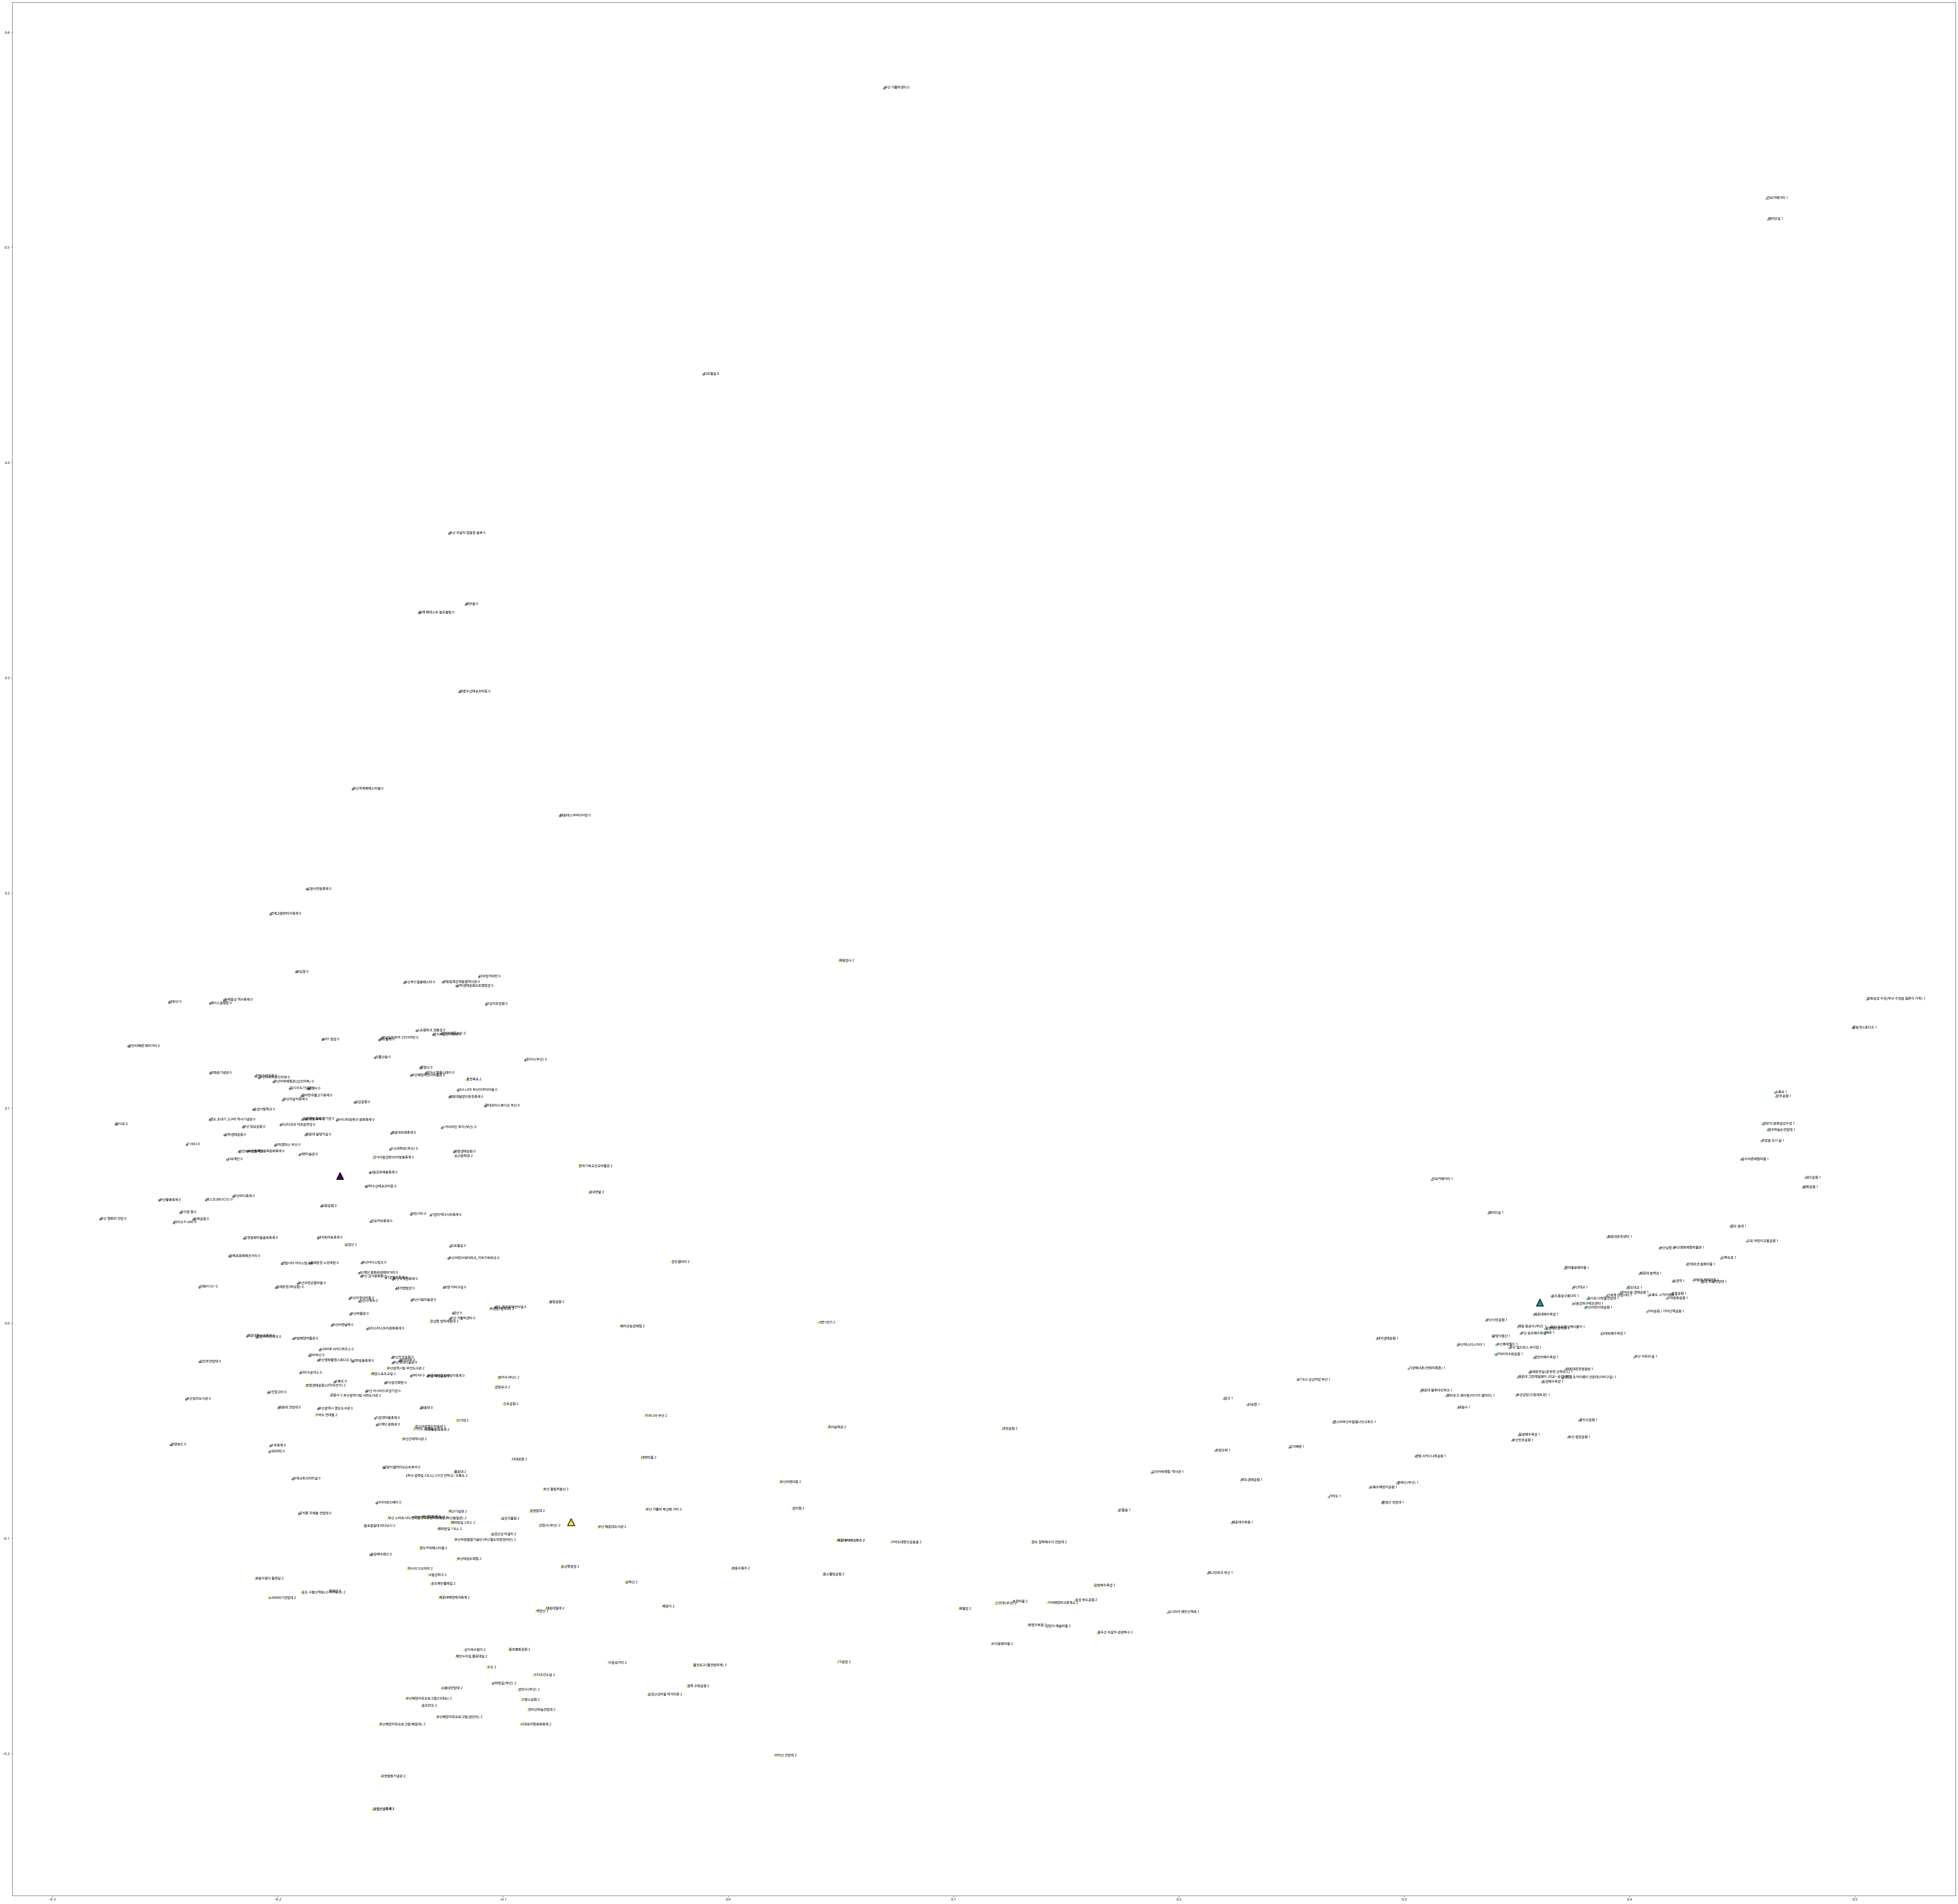

In [ ]:
plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], df_merge['keyword'][i] + ' ' + str(labels[i]))

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=400, linewidth=2, edgecolor='k')

# plt.show()

plt.savefig('savefig_big.png')

In [ ]:
# 각 클러스터의 중심 단어

import numpy as np

order_centroids = model.cluster_centers_.argsort()[:, ::1]

terms = tfidf_vectorizer.get_feature_names()

for i in range(3):

    print("Cluster %d:" % i, end='')

    for ind in order_centroids[i, :1000]:

        print(' %s' % terms[ind], end='')

    print()

Cluster 0: 자연 친구 운영 주차 입구 카페 바다 주차장 공간 여유 안내 산책 장소 무료 맛집 포토 공원 분위기 체험 풍경 식당 주말 저녁 진행 해변 발견 한잔 감상 예약 매력 내부 점심 특별 도보 엄마 대표 다양 힐링 화장실 명소 인기 버스 고민 추억 촬영 친절 불편 야외 관람 주문 서비스 계단 지하철 데이트 해수욕장 야경 후기 마을 커피 휴식 판매 택시 평일 열차 건물 영상 자리 실내 메뉴 마감 전망대 편안 볼거리 재미 시설 탑승 부산역 기념 스카이 출구 기억 날씨 오픈 공부 행사 할인 구입 영업 축제 바닷가 일본 전시 산책로 아침 비치 정류장 직원 휴무 인증 돼지국밥 감성 골목 유명 가격 터널 전망 오션 포장 동물 혼자 감동 요금 아빠 지인 운행 입장료 결제 맥주 해안 대교 동네 국밥 매장 웨이팅 작품 구이 노을 예술 정거장 테라스 소품 아메리카노 언니 왕복 광장 파도 낭만 요트 구간 예매 남편 피곤 어묵 대여 박물관 파크 조명 도시 하늘 떡볶이 먹거리 달맞이 조선 패스 티켓 간식 자랑 기차 밀면 라떼 스팟 디저트 치즈 겨울 아이스크림 모래 구름 아이 연인 언덕 인테리어 선물 공연 기념품 동해 대기 체력 자유 휴가 좌석 햇빛 입장 일몰 시장 대중교통 전쟁 국물 계절 테마 커플 공항 경치 조형물 창가 운동 여름 라면 인분 해양 음식 드라이브 도심 프로그램 음료 취향 비행기 케이블카 시티투어 벚꽃 놀이 조개 식사 문화 오빠 빌딩 튀김 동생 해상 아트 국립 엘리베이터 카메라 사랑 참여 바위 차량 매표소 어른 어린이 포즈 전시관 단체 김밥 도서관 피크닉 교육 대학교 와인 브런치 갤러리 운전 센터 미술관 피자 횟집 새우 벽화 만두 도전 터미널 오후 정원 학교 음악 상품 해녀 메뉴판 음식점 고개 타워 숲길 바람 수영장 요트투어 유람선 전시회 가족 다리 해산물 편도 양념 평화 겹벚꽃 본점 소스 쿠키 작가 낙동강 캠핑 부부 생태 나무 등산 치유 서핑 국제 햇살 규모 이야기 손님 자동차 쇼핑 골목길 에어컨 구름다리 기록 환경 소주 부모 치킨 호떡 분수 일출 갈비 

In [27]:
# cluster를 df_merge 에 추가

df_merge['cluster'] = labels

In [28]:
# keyword와 cluster만 뽑아서 저장

df_cluster=df_merge[['keyword', 'cluster']]
df_cluster

,keyword,cluster
0,서면1번가,0
1,광안리해수욕장,0
2,송정해수욕장,0
3,해운대해수욕장,0
4,오륙도,1
...,...,...
318,영도커피페스티벌,1
319,연제고분판타지축제,2
320,다대포어항문화축제,1
321,보수동책방골목문화축제,1


In [29]:
# df_cluster에 각 클러스터의 중심 단어 'noun' 컬럼에 추가

df_cluster['noun'] = ''

for i in range(3):

    print("Cluster %d:" % i, end='')

    for ind in order_centroids[i, :1000]:

        print(' %s' % terms[ind], end='')

        df_cluster['noun'][df_cluster['cluster']==i] = terms[ind]

    print()

df_cluster

<ipython-input-29-ce7d7c5667fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['noun'] = ''
<ipython-input-29-ce7d7c5667fa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['noun'][df_cluster['cluster']==i] = terms[ind]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inp

Cluster 0: 자연 친구 운영 주차 입구 카페 바다 주차장 공간 여유 안내 산책 장소 무료 맛집 포토 공원 분위기 체험 풍경 식당 주말 저녁 진행 해변 발견 한잔 감상 예약 매력 내부 점심 특별 도보 엄마 대표 다양 힐링 화장실 명소 인기 버스 고민 추억 촬영 친절 불편 야외 관람 주문 서비스 계단 지하철 데이트 해수욕장 야경 후기 마을 커피 휴식 판매 택시 평일 열차 건물 영상 자리 실내 메뉴 마감 전망대 편안 볼거리 재미 시설 탑승 부산역 기념 스카이 출구 기억 날씨 오픈 공부 행사 할인 구입 영업 축제 바닷가 일본 전시 산책로 아침 비치 정류장 직원 휴무 인증 돼지국밥 감성 골목 유명 가격 터널 전망 오션 포장 동물 혼자 감동 요금 아빠 지인 운행 입장료 결제 맥주 해안 대교 동네 국밥 매장 웨이팅 작품 구이 노을 예술 정거장 테라스 소품 아메리카노 언니 왕복 광장 파도 낭만 요트 구간 예매 남편 피곤 어묵 대여 박물관 파크 조명 도시 하늘 떡볶이 먹거리 달맞이 조선 패스 티켓 간식 자랑 기차 밀면 라떼 스팟 디저트 치즈 겨울 아이스크림 모래 구름 아이 연인 언덕 인테리어 선물 공연 기념품 동해 대기 체력 자유 휴가 좌석 햇빛 입장 일몰 시장 대중교통 전쟁 국물 계절 테마 커플 공항 경치 조형물 창가 운동 여름 라면 인분 해양 음식 드라이브 도심 프로그램 음료 취향 비행기 케이블카 시티투어 벚꽃 놀이 조개 식사 문화 오빠 빌딩 튀김 동생 해상 아트 국립 엘리베이터 카메라 사랑 참여 바위 차량 매표소 어른 어린이 포즈 전시관 단체 김밥 도서관 피크닉 교육 대학교 와인 브런치 갤러리 운전 센터 미술관 피자 횟집 새우 벽화 만두 도전 터미널 오후 정원 학교 음악 상품 해녀 메뉴판 음식점 고개 타워 숲길 바람 수영장 요트투어 유람선 전시회 가족 다리 해산물 편도 양념 평화 겹벚꽃 본점 소스 쿠키 작가 낙동강 캠핑 부부 생태 나무 등산 치유 서핑 국제 햇살 규모 이야기 손님 자동차 쇼핑 골목길 에어컨 구름다리 기록 환경 소주 부모 치킨 호떡 분수 일출 갈비 

,keyword,cluster,noun
0,서면1번가,0,그릇
1,광안리해수욕장,0,그릇
2,송정해수욕장,0,그릇
3,해운대해수욕장,0,그릇
4,오륙도,1,웨이팅
...,...,...,...
318,영도커피페스티벌,1,웨이팅
319,연제고분판타지축제,2,낙동강
320,다대포어항문화축제,1,웨이팅
321,보수동책방골목문화축제,1,웨이팅


In [30]:
# df_cluster에 df_merge의 'same' 컬럼 추가

df_cluster['same'] = df_merge['same']

df_cluster

,keyword,cluster,noun,same
0,서면1번가,0,그릇,알차다 싫다 사이좋다 사납다 인상깊다 낯설다 외롭다 하얗다 해맑다 드물다 덩그러다 ...
1,광안리해수욕장,0,그릇,틀림없다 알차다 싫다 사이좋다 인상깊다 낯설다 외롭다 하얗다 못지않다 벌겋다 따갑다...
2,송정해수욕장,0,그릇,틀림없다 알차다 흐드러지다 싫다 사이좋다 인상깊다 낯설다 외롭다 휑하다 하얗다 못지...
3,해운대해수욕장,0,그릇,틀림없다 알차다 흐드러지다 싫다 사이좋다 인상깊다 낯설다 외롭다 휑하다 하얗다 못지...
4,오륙도,1,웨이팅,싸다 끊임없다 무섭다 알차다 흐드러지다 싫다 귀여우다 멋있다 놀랍다 급하다 인상깊다...
...,...,...,...,...
318,영도커피페스티벌,1,웨이팅,싸다 무섭다 알차다 싫다 귀여우다 멋있다 추우다 놀랍다 슬프다 문제없다 급하다 인상...
319,연제고분판타지축제,2,낙동강,흐드러지다 싫다 걸맞다 멋있다 노랗다 가볍다 앙증맞다 엄청나다 휑하다 젊다 못지않다...
320,다대포어항문화축제,1,웨이팅,흔하다 싸다 기쁘다 무섭다 쩔다 알차다 싫다 귀여우다 오래다 멋있다 시끄럽다 급하다...
321,보수동책방골목문화축제,1,웨이팅,싸다 숱하다 무섭다 싫다 멋있다 무겁다 슬프다 급하다 즐겁다 가볍다 활기차다 젊다 ...


In [31]:
df_cluster.to_csv('df_cluster_adj.csv', encoding='utf-8-sig', index=False)

# ----------------------------------

# test

In [ ]:
# # 벡터화
# # tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['merge'])

# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['merge'])

# tfidf_matrix.shape

(427, 1518)

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['same'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['same'])

tfidf_matrix.shape

(323, 756)

In [ ]:
# 위 코드를 사용하여 tfidf_matrix K-Means 모델 생성

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
model.fit(tfidf_matrix)
labels = model.predict(tfidf_matrix)

labels

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,

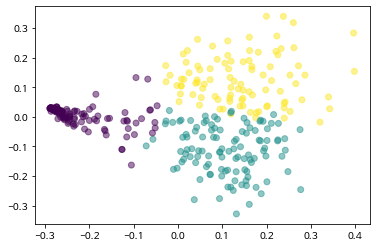

In [ ]:
# (0,1) 사이에 나오게 하기 위해 PCA 사용

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

plt.show()

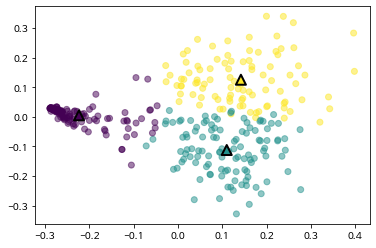

In [ ]:
# cluster == 0 의 중심점을 표시

import numpy as np

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, edgecolor='k')
plt.show()

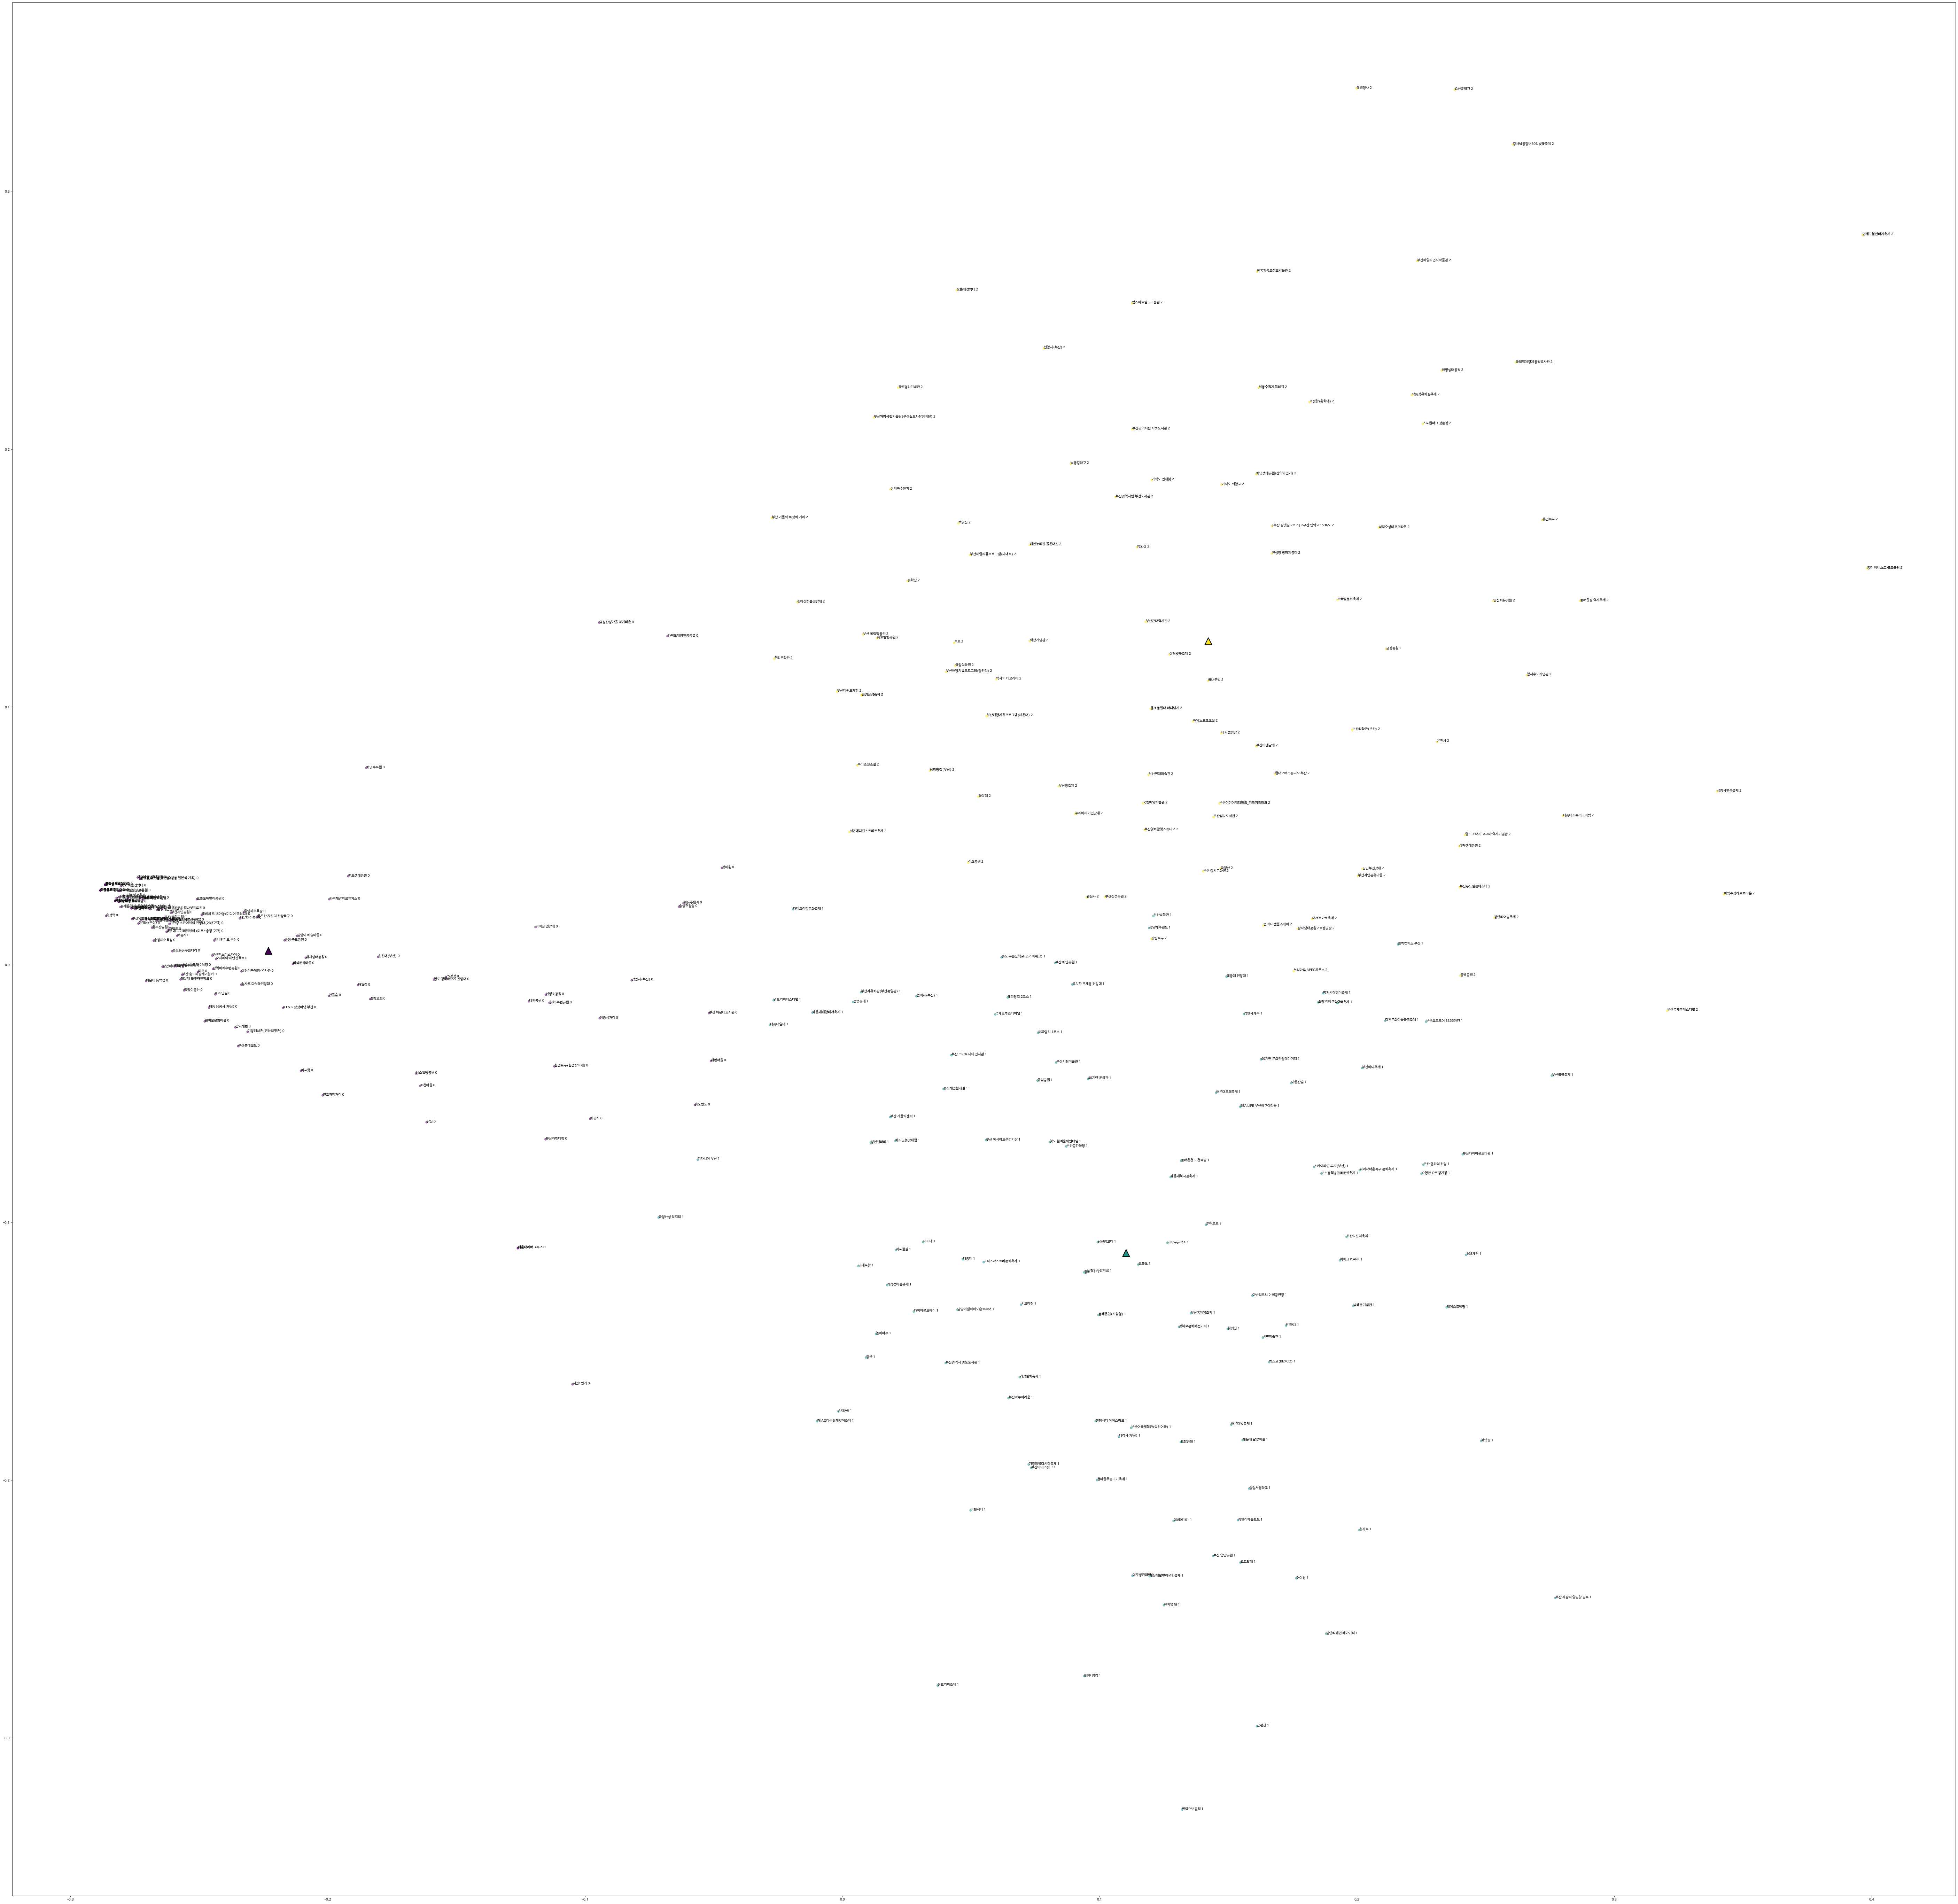

In [ ]:
plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], df_merge['keyword'][i] + ' ' + str(labels[i]))

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=400, linewidth=2, edgecolor='k')

# plt.show()

plt.savefig('savefig_big.png')

# 2 tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['same'])

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['same'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['same'] + df_merge['noun'])

tfidf_matrix.shape

(323, 749)

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

array([2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,

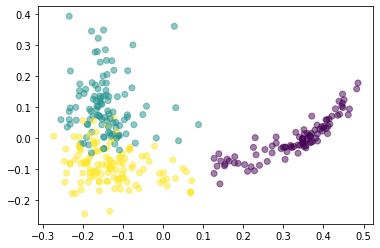

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 중심점 정리

In [ ]:
# 각 클러스터의 중심점을 구함

centroids = kmeans.cluster_centers_
centroids

In [ ]:
# 각 클러스터의 중심점을 표시

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', alpha=0.5)

plt.show()

In [ ]:
# 0번 클러스터의 중심점을 구함

center_0 = kmeans.cluster_centers_[0]

In [ ]:
# 0번 클러스터의 중심점을 시각화

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(center_0[0], center_0[1], s=100, c='green', alpha=0.5)

plt.show()

# 각 포인트와 가장 가까운 centroid의 거리를 구함

# 뻘짓

In [ ]:
# 각 포인트와 가장 가까운 중심점의 거리를 구함

import numpy as np
from scipy.spatial import distance

# 포인트와 centroid의 거리 계산

distances = distance.cdist(tfidf_matrix.toarray(), centroids, 'euclidean')

In [ ]:
# distances 표시

distances

In [ ]:
distances[0]

In [ ]:
distances[1]

In [ ]:
distances[2]

In [ ]:
distances[300]

In [ ]:
# 0번 클러스터와 0번 클러스터 중심점의 거리 구하기

distances[0][0]

In [ ]:
# diameter를 구함

diameter = np.max(distances[0][0])
diameter

In [ ]:
# 0번 클러스터와 1번 클러스터 중심점의 거리 구하기

distances[0][1]

In [ ]:
# 0번 클러스터와 2번 클러스터 중심점의 거리 구하기

distances[0][2]

In [ ]:
# 0번 클러스터에 속하는 포인트의 갯수

np.sum(kmeans.labels_ == 0)

# 분해 조립

In [ ]:
pca = PCA(n_components=2)

In [ ]:
data = pca.fit_transform(kmeans)
data.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [ ]:
kmeans.fit(tfidf_matrix)

In [ ]:
# 각 클러스터의 중심점 구하기

centroids = kmeans.cluster_centers_
centroids

In [ ]:
# kmeans.labes_ == 0인 것들 만 분류하고 그 tfidf_matrix를 구함

c_0 = tfidf_matrix[kmeans.labels_ == 0]

In [ ]:
# c_0의 중심점을 구함

c_0_centroid = np.mean(c_0.toarray(), axis=0)
c_0_centroid

In [ ]:
# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_0.toarray())

pca_data = pca.transform(c_0.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_0_centroid[0], c_0_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
# kmeans.labes_ == 1인 것들 만 분류하고 그 tfidf_matrix를 구함

c_1 = tfidf_matrix[kmeans.labels_ == 1]

c_1_centroid = np.mean(c_1.toarray(), axis=0)
c_1_centroid

# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_1.toarray())

pca_data = pca.transform(c_1.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_1_centroid[0], c_1_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
# kmeans.labes_ == 2인 것들 만 분류하고 그 tfidf_matrix를 구함

c_2 = tfidf_matrix[kmeans.labels_ == 2]

c_2_centroid = np.mean(c_2.toarray(), axis=0)
c_2_centroid

# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_2.toarray())

pca_data = pca.transform(c_2.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_2_centroid[0], c_2_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
cluster = kmeans.predict(tfidf_matrix)
cluster

In [ ]:
center = kmeans.cluster_centers_
center

In [ ]:
# c_0, c_1, c_2를 함께 표시 하고 c_0_centroid, c_1_centroid, c_2_centroid를 함께 시각화

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(center[:, 0], center[:,1], c=kmeans.cluster_centers_, alpha=0.5)

# plt.scatter(c_0_centroid[0], c_0_centroid[1], s=100, c='green', alpha=0.5)

# plt.scatter(c_1_centroid[0], c_1_centroid[1], s=100, c='green', alpha=0.5)

# plt.scatter(c_2_centroid[0], c_2_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

# k-medroids, 개판임

In [ ]:
! pip install scikit-learn-extra

In [ ]:
# k-medoids 알고리즘을 이용한 클러스터링

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=9, max_iter=30,random_state=42).fit(tfidf_matrix)

kmedoids.labels_

In [ ]:
# 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

plt.show()

# 2-1

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['same'] - df_merge['noun'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['same'] - df_merge['noun'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 3 tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['same'])

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['same'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['same'],df_merge['noun'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

4

In [ ]:
# df_merge1 생성

df_merge1 = df_merge.copy()


In [ ]:
# df_merge1의 'same' 와 'noun'을 합침

df_merge1['plus'] = df_merge1['same'] + df_merge1['noun']
df_merge1.head()

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge1['plus'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge1['plus'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 이하는 실패한 내용

In [ ]:
# 벡터화
# tfidf_vectorizer.fit_transform(df_merge['noun'])와 tfidf_vectorizer.fit_transform(df_merge['same'])의 곱으로 표현

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# tfidf_matrix_1 = tfidf_vectorizer.fit_transform(df_merge['noun'])
# tfidf_matrix_2 = tfidf_vectorizer.fit_transform(df_merge['same'])



tfidf_matrix_1 = tfidf_vectorizer.fit_transform(df_merge['noun']).toarray()
tfidf_matrix_2 = tfidf_vectorizer.fit_transform(df_merge1['same']).toarray()

In [ ]:
# tfidf_matrix_1.shape가 tfidf_matrix_2 와 다르다면 tfidf_matrix_1 크기를 tfidf_matrix_2 크기로 맞춰준다.

tfidf_matrix_1.shape

tfidf_matrix_2.shape

tfidf_matrix_1 = tfidf_matrix_1[:tfidf_matrix_2.shape[0], :tfidf_matrix_2.shape[1]]

tfidf_matrix_1.shape

In [ ]:
# tfidf_matrix_1.shape를 (427,1063)로 확장

tfidf_matrix_1.resize((427,1063))

tfidf_matrix_1.shape

In [ ]:
# tfidf_matrix_1.shape가 tfidf_matrix_2 와 다르다면 tfidf_matrix_1 크기를 tfidf_matrix_2 크기로 맞추되 빈 공간에 0을 넣어준다.

import numpy as np

tfidf_matrix_1 = np.concatenate((tfidf_matrix_1, np.zeros((tfidf_matrix_2.shape[0] - tfidf_matrix_1.shape[0], tfidf_matrix_1.shape[1]))), axis=0)

tfidf_matrix_1.shape


In [ ]:

# tfidf_matrix_1 = tfidf_matrix_1.reshape(tfidf_matrix_1.shape[0], tfidf_matrix_1.shape[1], 1)
# tfidf_matrix_2 = tfidf_matrix_2.reshape(tfidf_matrix_2.shape[0], tfidf_matrix_2.shape[1], 1)

tfidf_matrix = tfidf_matrix_1 + tfidf_matrix_2

tfidf_matrix.shape